In [ ]:
DATA_BATH = "/content/Clustering_gmm.csv"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# GMM - Gaussian Mixture Models

In [ ]:
# Read the dataset
data = pd.read_csv(DATA_BATH)
data.shape

(500, 2)

<function matplotlib.pyplot.show>

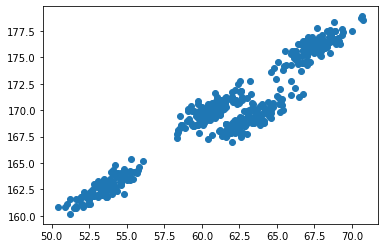

In [ ]:
# Plot the dataset
plt.scatter(data["Weight"], data["Height"])
plt.show

In [ ]:
# Train the model
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
# Prediction
labels = gmm.predict(data)
data["cluster"] = labels
data.columns

Index(['Weight', 'Height', 'cluster'], dtype='object')

In [ ]:
# Number of clusters
len(data["cluster"].unique())

4

<function matplotlib.pyplot.show>

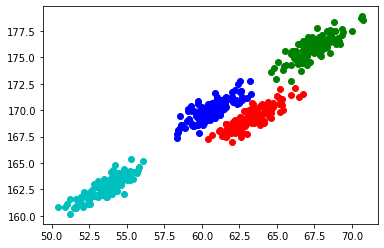

In [ ]:
# Plot the clusters
color = ["b", "g", "c", "r"]
for k in range(len(data["cluster"].unique())):
    cluster = data[data["cluster"] == k]
    plt.scatter(cluster["Weight"], cluster["Height"], c=color[k])
plt.show



---



# HMM - Hidden Markov Model

In [ ]:
# Transition Probabilities
P_SS = 0.8
P_SR = 0.2
P_RS = 0.4
P_RR = 0.6

# Initial Probabilities
P_S = 2/3
P_R = 1/3

# Emission Probabilities
P_SH = 0.8
P_SG = 0.2
P_RH = 0.4
P_RG = 0.6

In [ ]:
moods = ["H", "H", "G", "G", "G", "H"]
probabilities = []
weather = []

In [ ]:
if moods[0] == "H":
    probabilities.append((P_S * P_SH, P_R * P_RH))
else:
    probabilities.append((P_S * P_SG, P_R * P_RG))

In [ ]:
for i in range(1, len(moods)):
    yesterday_sunny, yesterday_rainy = probabilities[-1]
    if moods[i] == "H":
        today_sunny = max(yesterday_sunny * P_SS * P_SH, 
                                            yesterday_rainy * P_RS * P_SH)
        today_rainy = max(yesterday_sunny * P_SR * P_RH,
                                            yesterday_rainy * P_RR * P_RH)
        probabilities.append((today_sunny, today_rainy))
    else:
        today_sunny = max(yesterday_sunny * P_SS * P_SG, 
                                            yesterday_rainy * P_RS * P_SG)
        today_rainy = max(yesterday_sunny * P_SR * P_RG,
                                            yesterday_rainy * P_RR * P_RG)
        probabilities.append((today_sunny, today_rainy))

In [ ]:
for p in probabilities:
    if p[0] > p[1]:
        weather.append("S")
    else:
        weather.append("R")

In [ ]:
weather

['S', 'S', 'S', 'R', 'R', 'S']